In [1]:
# csv 파일 Load
import pandas as pd
df = pd.read_csv("C:/Users/BeakNohYeon/Desktop/AppleStore.csv")

**Data Preperation**





In [2]:
categorys = {}

# 장르에 고유값(0~22)을 메김
def getCategorys(x):
    if not (x in categorys):
        categorys[x] = len(categorys)
        
# categorys 배열을 String형으로 변환.
def ReplaceString(x):
    for category in categorys:
        x = x.replace(category,str(categorys[category]))
    return x

def DevideRating2(x):
    x2 = (int)(x*2);
    if(x2 >= 8):
        return 1
    else:
        return 0

def DevideRating5(x):
    if (int)(x) == 5  :
      return 4
    return (int)(x) 
    
def DevideRating11(x):
    return (int)(x*2)

# String -> Float 함수
# "+"를 "" 으로 변환 / ","를 "" 으로 변환
def StringToFloat(x):
    return float(x.replace("+","").replace(",",""))


In [3]:
#장르 숫자로 바꾸기 예) Game -> 0
df['prime_genre'].apply(getCategorys)
#categorys

0       None
1       None
2       None
3       None
4       None
        ... 
7192    None
7193    None
7194    None
7195    None
7196    None
Name: prime_genre, Length: 7197, dtype: object

In [4]:
#전처리
df2 = df.drop(['track_name','currency','rating_count_ver','user_rating_ver','ver','vpp_lic', 'id'], axis = 1)
df2['prime_genre'] = df2['prime_genre'].apply(ReplaceString)
df2['cont_rating'] = df2['cont_rating'].apply(StringToFloat)
df2

,Unnamed: 0,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,100788224,3.99,21292,4.0,4.0,0,38,5,10
1,2,158578688,0.00,161065,4.0,4.0,1,37,5,23
2,3,100524032,0.00,188583,3.5,4.0,2,37,5,3
3,4,128512000,0.00,262241,4.0,12.0,3,37,5,9
4,5,92774400,0.00,985920,4.5,4.0,4,37,5,45
...,...,...,...,...,...,...,...,...,...,...
7192,11081,126644224,0.00,142,4.5,4.0,0,38,5,1
7193,11082,120760320,0.00,30,4.5,4.0,0,38,0,1
7194,11087,111322112,1.99,15,4.5,9.0,7,37,1,1
7195,11089,97235968,0.00,85,4.5,12.0,0,38,0,2


In [5]:
df2

,Unnamed: 0,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,100788224,3.99,21292,4.0,4.0,0,38,5,10
1,2,158578688,0.00,161065,4.0,4.0,1,37,5,23
2,3,100524032,0.00,188583,3.5,4.0,2,37,5,3
3,4,128512000,0.00,262241,4.0,12.0,3,37,5,9
4,5,92774400,0.00,985920,4.5,4.0,4,37,5,45
...,...,...,...,...,...,...,...,...,...,...
7192,11081,126644224,0.00,142,4.5,4.0,0,38,5,1
7193,11082,120760320,0.00,30,4.5,4.0,0,38,0,1
7194,11087,111322112,1.99,15,4.5,9.0,7,37,1,1
7195,11089,97235968,0.00,85,4.5,12.0,0,38,0,2


In [6]:
#2구간으로 레이팅 분할
df_svm = df2
df_svm['user_rating'] = df2['user_rating'].apply(DevideRating2)
df_svm

,Unnamed: 0,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,100788224,3.99,21292,1,4.0,0,38,5,10
1,2,158578688,0.00,161065,1,4.0,1,37,5,23
2,3,100524032,0.00,188583,0,4.0,2,37,5,3
3,4,128512000,0.00,262241,1,12.0,3,37,5,9
4,5,92774400,0.00,985920,1,4.0,4,37,5,45
...,...,...,...,...,...,...,...,...,...,...
7192,11081,126644224,0.00,142,1,4.0,0,38,5,1
7193,11082,120760320,0.00,30,1,4.0,0,38,0,1
7194,11087,111322112,1.99,15,1,9.0,7,37,1,1
7195,11089,97235968,0.00,85,1,12.0,0,38,0,2


In [7]:
df_rating = df_svm.loc[:,['user_rating']]
df_svm = df_svm.drop('user_rating',1)
df_svm

,Unnamed: 0,size_bytes,price,rating_count_tot,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,100788224,3.99,21292,4.0,0,38,5,10
1,2,158578688,0.00,161065,4.0,1,37,5,23
2,3,100524032,0.00,188583,4.0,2,37,5,3
3,4,128512000,0.00,262241,12.0,3,37,5,9
4,5,92774400,0.00,985920,4.0,4,37,5,45
...,...,...,...,...,...,...,...,...,...
7192,11081,126644224,0.00,142,4.0,0,38,5,1
7193,11082,120760320,0.00,30,4.0,0,38,0,1
7194,11087,111322112,1.99,15,9.0,7,37,1,1
7195,11089,97235968,0.00,85,12.0,0,38,0,2


In [8]:
df_rating_temp=df_rating.copy()
##df_rating_temp=df_rating_temp.astype(int)
##df_rating_temp=df_rating_temp.values
df_rating_temp

,user_rating
0,1
1,1
2,0
3,1
4,1
...,...
7192,1
7193,1
7194,1
7195,1


In [9]:
array_rating_temp=df_rating_temp.values
array_rating_temp

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [10]:
from sklearn.preprocessing import StandardScaler
"""
def StandardNorm(testset):
    std_scaler = StandardScaler()
    arrScaled = std_scaler.fit_transform(testset.values)
    dfScaled = pd.DataFrame(arrScaled, columns=testset.columns)
    return dfScaled

df_svm = StandardNorm(df_svm)
"""
df_svm

,Unnamed: 0,size_bytes,price,rating_count_tot,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,100788224,3.99,21292,4.0,0,38,5,10
1,2,158578688,0.00,161065,4.0,1,37,5,23
2,3,100524032,0.00,188583,4.0,2,37,5,3
3,4,128512000,0.00,262241,12.0,3,37,5,9
4,5,92774400,0.00,985920,4.0,4,37,5,45
...,...,...,...,...,...,...,...,...,...
7192,11081,126644224,0.00,142,4.0,0,38,5,1
7193,11082,120760320,0.00,30,4.0,0,38,0,1
7194,11087,111322112,1.99,15,9.0,7,37,1,1
7195,11089,97235968,0.00,85,12.0,0,38,0,2


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_svm, df_rating_temp, test_size = 0.9, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1)

In [12]:
x_train

,Unnamed: 0,size_bytes,price,rating_count_tot,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
1667,1937,520400896,4.99,95,4.0,0,24,5,1
2221,2590,139014144,0.00,72989,12.0,0,37,2,5
6407,9267,95218688,0.00,0,12.0,0,37,0,2
373,422,66138112,1.99,4255,4.0,4,38,5,1
410,469,61595648,4.99,5397,4.0,0,40,5,7
...,...,...,...,...,...,...,...,...,...
5591,7561,56381440,0.00,8,4.0,0,40,0,2
5192,6859,289332224,0.00,239,9.0,0,38,5,1
1389,1607,171828224,0.00,32492,12.0,0,38,5,14
3449,4176,13816832,2.99,0,4.0,12,40,1,5


In [13]:
df_svm

,Unnamed: 0,size_bytes,price,rating_count_tot,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num
0,1,100788224,3.99,21292,4.0,0,38,5,10
1,2,158578688,0.00,161065,4.0,1,37,5,23
2,3,100524032,0.00,188583,4.0,2,37,5,3
3,4,128512000,0.00,262241,12.0,3,37,5,9
4,5,92774400,0.00,985920,4.0,4,37,5,45
...,...,...,...,...,...,...,...,...,...
7192,11081,126644224,0.00,142,4.0,0,38,5,1
7193,11082,120760320,0.00,30,4.0,0,38,0,1
7194,11087,111322112,1.99,15,9.0,7,37,1,1
7195,11089,97235968,0.00,85,12.0,0,38,0,2


In [14]:
# import SVM
from sklearn import svm
from sklearn.metrics import accuracy_score
#정규화한 데이터를 사용하였다. (x_train_scaled, x_val_scaled)
lin_svm = svm.LinearSVC()

index = 0
df_result = pd.DataFrame(columns=["model","x0","x1","score"])



def ExecuteSVM(model,i,j,x_train,y_train):
    global index
    f1 = x_train.columns[i]
    f2 = x_train.columns[j]
    x_train = x_train[[f1,f2]]
    model.fit(x_train,y_train.values.ravel())
    lin_svm_predict = model.predict(x_train)
    score = accuracy_score(y_train.values.ravel(), lin_svm_predict)
    df_result.loc[index,:] = [index,f1,f2,score]
    index = index + 1
    
for i in range(len(df_svm.columns)):
    j = i +1
    while(1):
        if(j > len(df_svm.columns)-1):
            break
        ExecuteSVM(lin_svm,i,j,x_train,y_train)
        j += 1

C:\Users\BeakNohYeon\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BeakNohYeon\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BeakNohYeon\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BeakNohYeon\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\BeakNohYeon\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

In [15]:
df_result.sort_values(by=['score'], axis=0, ascending = False)

,model,x0,x1,score
24,24,rating_count_tot,ipadSc_urls.num,0.751159
23,23,rating_count_tot,sup_devices.num,0.741886
15,15,price,rating_count_tot,0.723338
25,25,rating_count_tot,lang.num,0.720247
31,31,prime_genre,ipadSc_urls.num,0.644513
28,28,cont_rating,ipadSc_urls.num,0.641422
19,19,price,ipadSc_urls.num,0.641422
2,2,Unnamed: 0,rating_count_tot,0.638331
0,0,Unnamed: 0,size_bytes,0.632148
29,29,cont_rating,lang.num,0.629057


In [16]:
df_svm=df_svm[['rating_count_tot','prime_genre']]
df_svm=df_svm.values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_svm, df_rating_temp, test_size = 0.9, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1)

In [25]:
red_RGB = (1, 0, 0)
blue_RGB = (0, 0, 1)
data_colors = [red_RGB, blue_RGB]

def read_points_file(filename):
    points = []
    with open(filename, "r") as f:
        for point in f:
            point = point.strip("\n").split()
            points.append([float(point[0]), float(point[1])])
    return points

def read_data(class_0_file, class_1_file):
    points_label0 = read_points_file(class_0_file)
    points_label1 = read_points_file(class_1_file)
    points = points_label0 + points_label1
    points = np.array(points)
    
    label0, label1 = [0], [1]
    num_of_label0, num_of_label1 = len(points_label0), len(points_label1)
    labels = label0 * num_of_label0 + label1 * num_of_label1
    
    return (points, labels)


def plot_data(X_train, y_train, X_test, y_test):
  
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))

    colors = get_colors(y)
    colors_train = get_colors(y_train)
    colors_test = get_colors(y_test)

    plt.figure(figsize=(12, 4), dpi=150)

    # Plot all data plot
    plt.subplot(131)
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    plt.title("Data (100%)")


    # training data plot
    plt.subplot(132)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_train[:, 0], X_train[:, 1], c = colors_train, s = 10, edgecolors=colors_train)
    plt.title("Training Data (80%)")

    # testing data plot
    plt.subplot(133)
    plt.axis('equal')
    #plt.axis('off')
    plt.scatter(X_test[:, 0], X_test[:, 1], c = colors_test, s = 10, edgecolors=colors_test)
    plt.title("Test Data (20%)")
    plt.tight_layout()
    plt.show()

def get_colors(y):
    return [data_colors[label] for label in y]

def plot_decision_function(X_train, y_train, X_test, y_test, clf):
    plt.figure(figsize=(8, 4), dpi=150)
    plt.subplot(121)
    plt.title("Training data")
    plot_decision_function_helper(X_train, y_train, clf)
    plt.subplot(122)
    plt.title("Test data")
    plot_decision_function_helper(X_test, y_test, clf, True)
    plt.show()


def plot_decision_function_helper(X, y, clf, show_only_decision_function = False):

    colors = get_colors(y)
    plt.axis('equal')
    plt.tight_layout()
    #plt.axis('off')

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=10, edgecolors=colors)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T # xy.shape = (900, 2)
    Z = clf.decision_function(xy).reshape(XX.shape)
    # clf.decision_function(xy).shape = (900,)
    # Z.shape = (30, 30)

    if  show_only_decision_function:
    # Plot decision boundary
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                 linestyles=['-'])
    else :
    # Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    # Plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 10,
    #         linewidth=1, facecolors='k', c = 'k', label='Support Vectors')

    #plt.legend(fontsize='small')

**Classification**





In [26]:
x_train

array([[95, '0'],
       [72989, '0'],
       [0, '0'],
       ...,
       [32492, '0'],
       [0, '12'],
       [776, '0']], dtype=object)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
clf = svm.SVC(kernel='rbf')

clf.fit(x_train, y_train)
plot_data(x_train,y_train,x_test,y_test)
plot_decision_function(x_train,y_train,x_test,y_test,clf)
clf_predictions=clf.predict(x_test)
print("Accuracy:{}%".format(clf.score(x_test,y_test)*100))
## rgf svm 을 시각화하는 과정

C:\Users\BeakNohYeon\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: only integer scalar arrays can be converted to a scalar index

ValueError: cannot reshape array of size 9000 into shape (30,30)

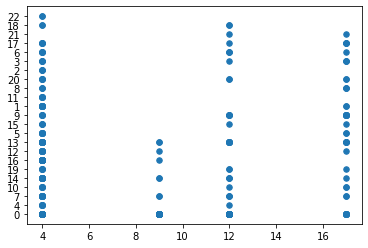

In [37]:
# 샘플 데이터 표현
plt.scatter(x_train[:,0], x_train[:,1],s=30, cmap=plt.cm.Paired)
# 초평면(Hyper-Plane) 표현
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

In [ ]:
y_train